<a href="https://www.kaggle.com/code/oksanaturii/oksana-binary-prediction-with-a-rainfall-dataset?scriptVersionId=227477557" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e3/sample_submission.csv
/kaggle/input/playground-series-s5e3/train.csv
/kaggle/input/playground-series-s5e3/test.csv


In [2]:
train_path = "/kaggle/input/playground-series-s5e3/train.csv"
test_path = "/kaggle/input/playground-series-s5e3/test.csv"

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

train_data.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [3]:
test_data.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [4]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Створюємо графік 
#sns.countplot(x='maxtemp', hue='humidity', data=train_data)
#plt.title('humidity depends on maxtempereture')
#plt.show()

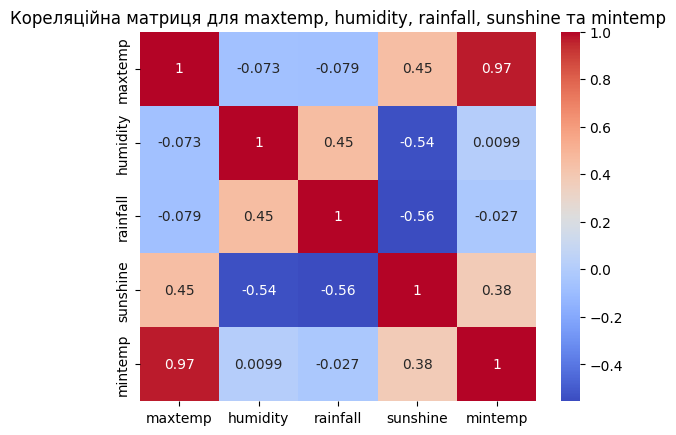

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Кореляційна матриця 
corr_matrix = train_data[['maxtemp', 'humidity', 'rainfall', 'sunshine', 'mintemp']].corr()

# Візуалізуємо кореляційну матрицю
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Кореляційна матриця для maxtemp, humidity, rainfall, sunshine та mintemp")
plt.show()


In [6]:
X = train_data.drop(columns=['rainfall', 'id', 'day'])  
y = train_data['rainfall'] 

In [7]:
from sklearn.model_selection import train_test_split

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Видаляємо ті ж самі колонки з test_data
test_features = test_data.drop(columns=['id', 'day'])

# Check the size
print(X_train.shape, X_test.shape)

(1752, 10) (438, 10)


In [8]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Error (MAE): 0.23657117356621227
Mean Squared Error (MSE): 0.11749918913122163


In [10]:
print("Train feature columns:", X_train.columns.tolist())
print("Test feature columns:", test_features.columns.tolist())

Train feature columns: ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']
Test feature columns: ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


In [11]:
test_features = test_features[X_train.columns]

In [12]:
print(test_features.dtypes)
print(X_train.dtypes)

pressure         float64
maxtemp          float64
temparature      float64
mintemp          float64
dewpoint         float64
humidity         float64
cloud            float64
sunshine         float64
winddirection    float64
windspeed        float64
dtype: object
pressure         float64
maxtemp          float64
temparature      float64
mintemp          float64
dewpoint         float64
humidity         float64
cloud            float64
sunshine         float64
winddirection    float64
windspeed        float64
dtype: object


In [13]:
print(test_features.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64


In [14]:
test_features = test_features.fillna(test_features.mean())

In [15]:
baseline_pred = np.full_like(y_test, y_train.mean())
baseline_mae = mean_absolute_error(y_test, baseline_pred)
print(f"Baseline MAE: {baseline_mae}")

Baseline MAE: 0.728310502283105


In [16]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.4061928179002112


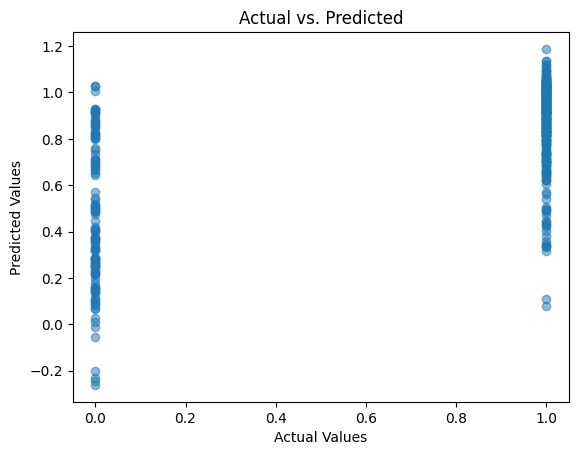

In [17]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()

In [18]:
# from sklearn.ensemble import RandomForestRegressor

# rf_model = RandomForestRegressor()
# rf_model.fit(X_train, y_train)
# y_pred_rf = rf_model.predict(X_test)

# print("MAE:", mean_absolute_error(y_test, y_pred_rf))
# print("MSE:", mean_squared_error(y_test, y_pred_rf))

In [19]:
# print(f"test_data shape: {test_data.shape}")  # Should match number of rows in test.csv
# print(f"test_predictions shape: {test_predictions.shape}") 

In [20]:
# Drop the "id" column before making predictions
# test_features = test_data.drop(columns=["id"]) 

# Predict on the entire test dataset
# test_predictions = model.predict(test_features)

# Ensure predictions are in the right shape
# test_predictions = test_predictions.flatten()

# Check the shape again
# print(f"Fixed test_predictions shape: {test_predictions.shape}")

In [21]:
# Ensure model is trained before making predictions
#test_predictions = model.predict(X_test)  # Use trained model

# Ensure predictions are within a valid range if necessary
#test_predictions = test_predictions.clip(0, 1)

# Create submission DataFrame
# submission = pd.DataFrame({
#     "id": test_data["id"],  
#     "rainfall": test_predictions
# })

# Save the submission file
# submission.to_csv("submission.csv", index=False)

# print("Submission file saved successfully!")

In [22]:
# Прогноз на змаганні тестових даних
# test_predictions = model.predict(test_features)

In [23]:
# 1. Робимо передбачення для тестового набору Kaggle
test_predictions = model.predict(test_features)

# 2. Формуємо submission DataFrame
submission = pd.DataFrame({
    "id": test_data["id"],  # ID з тестового набору
    "rainfall": test_predictions  # Передбачені значення
})

# 3. Зберігаємо у CSV
submission.to_csv("submission.csv", index=False)
print("Submission file saved successfully!")

Submission file saved successfully!
